# Import Modules

In [151]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import fitcode
import seaborn as sns

sns.set_theme(
    style="white",
    context="talk",
    palette="muted",
)

# Methode 1

Data:

In [152]:
df = pd.read_excel('m1.xlsx')

l = df["l (cm)"][0] / 100
T = df["10T (s)"] / 10
S_l = df["S_l (cm)"][0] / 100
S_T = df["10 S_T (s)"] / 10

Combine T:

In [153]:
G = 1 / S_T**2
T_med = np.sum(G * T) / np.sum(G)
S_T_med = 1 / np.sqrt(np.sum(G))

print(f"Gewogen gemiddelde: {T_med:.3f} sec")
print(f"Gecombineerde fout: {S_T_med:.5f} sec")

g = 4 * np.pi**2 * l / T_med**2
S_g = g * np.sqrt((S_l / l) ** 2 + 4 * (S_T_med / T_med)**2)

Gewogen gemiddelde: 1.992 sec
Gecombineerde fout: 0.00949 sec


Eindwaarde:

In [154]:
print(f"{g - S_g:.3f} < g < {g + S_g:.3f}")
print(f"g = {g:.3f} ± {S_g:.3f} m/s²")

9.758 < g < 9.955
g = 9.857 ± 0.098 m/s²


# Methode 2

Data:

In [155]:
df = pd.read_excel('m2.xlsx')

l = df["l (cm)"]/ 100
T = df["10T (s)"] / 10
S_l = df["S_l (cm)"] / 100
S_T = df["10 S_T (s)"] / 10

x = T**2
y = 4 * np.pi**2 * l
S_x = 2 * x * S_T
s_y = 3 * np.pi**2 * l

Fitter:

In [156]:
def formula(x, g):
    return g * x

fitter = fitcode.CurveFitter(formula)
fitter.add_measurements(x, S_x, 'T2')
fitter.add_free_parameter('g', 10)
fitter.set_target_data(y, S_y)

result = fitter.fit()
g = result.get_result('g')

Plot:

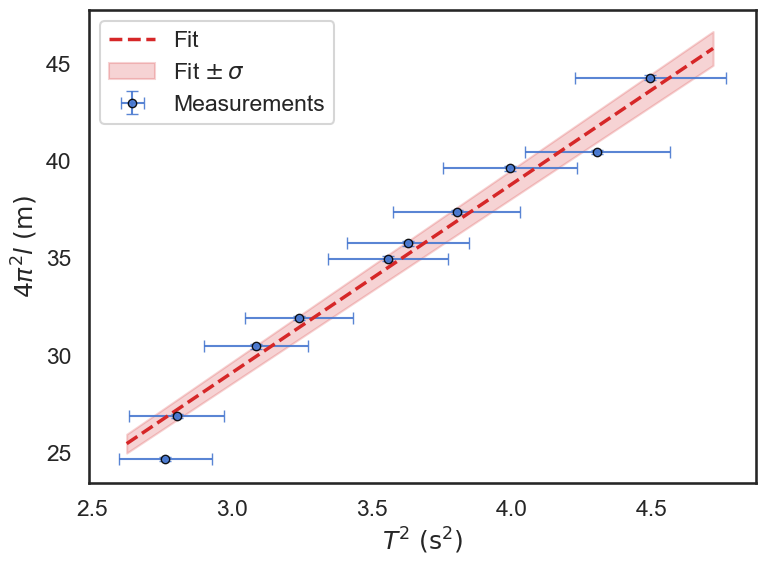

In [159]:
x_int = np.linspace(min(T2) * 0.95, max(T2) * 1.05, 200)

fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(
    x, y,
    xerr=S_x, yerr=S_y,
    fmt='o',
    markersize=6,
    capsize=4,
    elinewidth=1.5,
    markeredgecolor='black',
    alpha=0.9,
    label="Measurements"
)

y_fit = formula(x_int, g['fit'])
ax.plot(
    x_int, y_fit,
    linestyle='--',
    linewidth=2.5,
    color='tab:red',
    label="Fit"
)

y_upper = formula(x_int, g['fit'] + g['uncertainty'])
y_lower = formula(x_int, g['fit'] - g['uncertainty'])

ax.fill_between(
    x_int,
    y_lower,
    y_upper,
    color='tab:red',
    alpha=0.2,
    label=r"Fit $\pm\,\sigma$"
)

ax.set_xlabel(r"$T^2\ \mathrm{(s^2)}$")
ax.set_ylabel(r"$4\pi^2 l\ \mathrm{(m)}$")
ax.legend(frameon=True)

plt.tight_layout()
plt.savefig("./m2_plot.png", transparent=True)


Eindwaarde:

In [158]:
print(f"{g['fit'] - g['uncertainty']:.3f} < g < {g['fit'] + g['uncertainty']:.3f}")
print(f"g = {g['fit']:.3f} ± {g['uncertainty']:.3f} m/s²")

9.521 < g < 9.890
g = 9.705 ± 0.185 m/s²
